# 1. Import and Install Dependencies

In [1]:
%pip install tensorflow opencv-python numpy mediapipe scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\DGaytan\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
   # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5, model_complexity=2) as holistic:

    """
    model_complexity: 

    We can take off model_complexity or the complexity of the model, if it is 0 it will be 
    faster, but less accurate and if it is 2 it will be more accurate, but also slower.
    
    **** We can potentially do 2, when training and 0 during runtime"""

 
    
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [82]:
import cv2

# IP address and port number of your Android device running IP Webcam
url = 'http://10.0.0.144:8080'

# Create a VideoCapture object with the URL of the IP Webcam stream
cap = cv2.VideoCapture(url)

# Check if the camera is opened successfully
if not cap.isOpened():
    print("Failed to open the camera.")
else:
    print("Camera opened successfully.")

while cap.isOpened():
    # Read frame
    ret, frame = cap.read()

    if not ret:
        print("Failed to capture frame from camera.")
        break

    # Display the frame
    cv2.imshow('Android Camera Feed', frame)

    # Break the loop when 'q' is pressed
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Release the VideoCapture and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


In [8]:
cap.release()
cv2.destroyAllWindows()

In [9]:
draw_landmarks(frame, results)

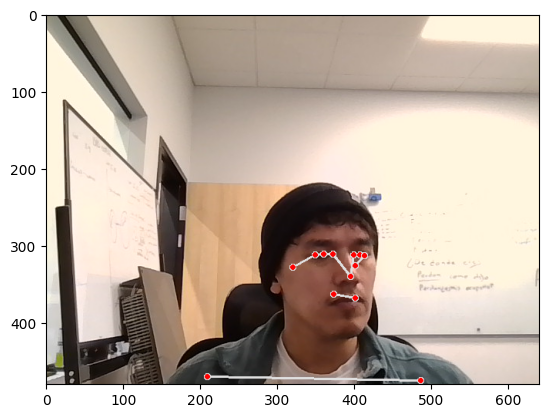

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [ ]:
len(results.left_hand_landmarks.landmark)

In [11]:
pose = []

if results.pose_landmarks:  # Check if pose landmarks are detected
    for res in results.pose_landmarks.landmark:
        test = np.array([res.x, res.y, res.z, res.visibility])
        pose.append(test)
else:
    print("No pose landmarks detected in the frame.")


In [12]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [13]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

In [14]:
result_test = extract_keypoints(results)

In [15]:
result_test.size   # With out face: 132(pose) + 63 (left hand) + (63 ) Right hand = 258 ******with face = 1662 

258

In [16]:
# For Testing

np.save('0', result_test)   # This will save the individual 0 frame 

In [ ]:
np.load('0.npy')   # This will load that individual frame

# 4. Setup Folders for Collection

In [ ]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('PreTrained') 

# Actions that we try to detect
#actions = np.array(['nothing','hello', 'more', 'love'])


alphabets = np.array(['A','B', 'C', 'D'])


no_sequences = 30


sequence_length = 30  # frames


In [ ]:
#For ______ in _________ you have to change the outter for loop for every model.
# Depending how you name the verb in the model's name

# Create the PreTrained folder if it doesn't exist
if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)
    print(f"Created directory: {DATA_PATH}")

# Create the 'alphabet' folder inside the PreTrained folder
alphabet_folder_path = os.path.join(DATA_PATH, 'alphabet')
if not os.path.exists(alphabet_folder_path):
    os.makedirs(alphabet_folder_path)
    print(f"Created directory: {alphabet_folder_path}")
    
# Create alphabet folders inside the 'alphabet' folder
for alphabet in alphabets:
    alphabet_path = os.path.join(alphabet_folder_path, alphabet)
    if not os.path.exists(alphabet_path):
        os.makedirs(alphabet_path)
        print(f"Created directory: {alphabet_path}")

    # Create sequence folders inside each alphabet folder
    for sequence in range(1, no_sequences + 1):
        sequence_path = os.path.join(alphabet_path, str(sequence))
        if not os.path.exists(sequence_path):
            os.makedirs(sequence_path)
            print(f"Created directory: {sequence_path}")



# 5. Collect Keypoint Values for Training and Testing

In [ ]:
import cv2

cap = cv2.VideoCapture(0)
export_complete = False  # Flag to track completion status

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5, model_complexity=2) as holistic:

    """
    model_complexity: 

    We can take off model_complexity or the complexity of the model, if it is 0 it will be 
    faster, but less accurate and if it is 2 it will be more accurate, but also slower.
    
    **** We can potentially do 2, when training and 0 during runtime"""

    try:
        paused = False  # Initialize the pause state
        while True:  # Infinite loop for continuous processing    

            if not paused and not export_complete: 
                # Loop through alphabets
                for alphabet in alphabets:  # Change this as well per model
                    # Show message for the next alphabet
                    cv2.putText(image, f'Next alphabet: {alphabet}', (120, 200), 
                                cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(5000)  # Wait for 5 seconds

                    # Loop through sequences aka videos
                    for sequence in range(1, no_sequences + 1):
                        # Loop through video length aka sequence length
                        for frame_num in range(sequence_length):

                            # Read feed
                            ret, frame = cap.read()

                            # Make detections
                            image, results = mediapipe_detection(frame, holistic)

                            # Draw landmarks
                            draw_styled_landmarks(image, results)

                            # Apply wait logic
                            if frame_num == 0: 
                                cv2.putText(image, 'STARTING COLLECTION', (120, 200), 
                                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                                cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(alphabet, sequence), (15, 12), 
                                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                                # Show to screen
                                cv2.imshow('OpenCV Feed', image)
                                cv2.waitKey(300)
                            else: 
                                cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(alphabet, sequence), (15, 12), 
                                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                                # Show to screen
                                cv2.imshow('OpenCV Feed', image)

                            # Export keypoints
                            if sequence in range(1, 31):  # Ensure saving keypoints only for frames within the sequence length
                                keypoints = extract_keypoints(results)
                                npy_path = os.path.join(DATA_PATH, 'alphabet', alphabet, str(sequence), str(frame_num +1)) + ".npy"
                                np.save(npy_path, keypoints)

                            # Check if keypoints export is complete
                            if sequence == no_sequences and frame_num == sequence_length - 1:
                                export_complete = True

                            # Break gracefully
                            if cv2.waitKey(10) & 0xFF == ord('q'):
                                raise KeyboardInterrupt

                            # Check for pause key (spacebar)
                            key = cv2.waitKey(1)
                            if key == ord(' '):  # Spacebar pressed
                                paused = not paused  # Toggle the paused state

                                # If paused, wait for a key press to resume
                                if paused:
                                    cv2.waitKey(-1)  # Wait indefinitely for a key press

            # If export is complete, break the loop
            if export_complete:
                break

    except KeyboardInterrupt:
        pass
    finally:
        # Release video capture and close all windows
        cap.release()
        cv2.destroyAllWindows()


In [ ]:
cap.release()
cv2.destroyAllWindows()

Store variables so that you can pull them back after a restart 


# 6. Preprocess Data and Create Labels and Features

In [17]:
import pickle
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical


In [ ]:

# Save gsture_name to a file
with open('alphabets.pkl', 'wb') as f:
    pickle.dump(alphabets, f)

In [ ]:
# Save action to a file
with open("alphabet.txt", "w") as f:
    f.write(alphabet)

In [18]:
import pickle
# If you are training another model. You have to load the previous actions to keep the labeling consistent 
# Load actions from the file
# import pickle

# # Load action labels
# with open('actions.pkl', 'rb') as f:
#     loaded_actions = pickle.load(f)
# label_map = {action: num for num, action in enumerate(loaded_actions)}

# Load alphabet labels (assuming you have a separate 'alphabets.pkl' file)
with open('alphabets.pkl', 'rb') as f:
    loaded_alphabets = pickle.load(f)
alphabet_labels = {alphabet: num for num, alphabet in enumerate(loaded_alphabets)}

# Ensure correct usage and potential updates:
#print("Action labels:", label_map)
print("Alphabet labels:", alphabet_labels)

# # Example prediction for the action model (assuming it predicts 'hello'):
# predicted_action_index = 1  # Based on your label_map
# predicted_action = label_map[predicted_action_index]  # 'hello'
# print("Predicted action:", predicted_action)

Alphabet labels: {'A': 0, 'B': 1, 'C': 2, 'D': 3}


AFTER YOU RESTART THE KERNAL OR SHUTDOWN THE COMPUTER

In [ ]:
# Load previous models gesture_name from the file
with open("action.txt", "r") as f:
    action = f.readlines()



In [21]:
import pickle

# Load the data from the file
with open('alphabets.pkl', 'rb') as f:
    loaded_alphabets = pickle.load(f)

# Now, loaded_alphabets contains the data you saved
print(loaded_alphabets)


['A' 'B' 'C' 'D']


In [22]:
# Only after a Kernel restart reload this variables
#actions = label_map
alphabets = loaded_alphabets
DATA_PATH = os.path.join('PreTrained') 
alphabet_folder_path = os.path.join(DATA_PATH, 'alphabet')
sequence_length = 30

In [23]:
import os
import numpy as np

# Initialize the sequences and labels lists
sequences, labels = [], []

# Loop through the alphabets
for alphabet in alphabets:
    # Get the sequence directories for the current alphabet
    sequence_dirs = os.listdir(os.path.join(alphabet_folder_path, alphabet))
    
    # Loop through the sequence directories
    for sequence_dir in sequence_dirs:
        # Initialize the window list for the current sequence
        window = []
        
        # Loop through the .npy files in the current sequence directory
        for frame_num in range(sequence_length):
            # Load the .npy file
            res = np.load(os.path.join(DATA_PATH, 'alphabet', alphabet, sequence_dir, "{}.npy".format(frame_num + 1)))
            
            # Append the loaded .npy file to the window list
            window.append(res)
        
        # Append the window list to the sequences list
        sequences.append(window)
        
        # Append the label for the current alphabet to the labels list
        labels.append(alphabet_labels[alphabet]) # Use alphabet as the label


        "Number of sequences and labels should be gesture folder x 30"

print("Number of sequences:", len(sequences))
print("Number of labels:", len(labels))


Number of sequences: 120
Number of labels: 120


In [ ]:
for i in range(len(sequences)):
    print(f"Sequence {i+1}: {sequences[i]}")

In [24]:
#print(loaded_actions)
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [25]:
np.array(sequences).shape    # amount of actions x 30 = amount of labels created

(120, 30, 258)

In [26]:
#np.array(loaded_actions).shape
np.array(labels).shape

(120,)

In [27]:
X = np.array(sequences)

In [28]:
print("X.shape", X.shape)

X.shape (120, 30, 258)


In [29]:
loaded_alphabets

array(['A', 'B', 'C', 'D'], dtype='<U1')

In [30]:
alphabet

'D'

In [31]:
# Make sure to import the libraries starting at section: 6
y = to_categorical(labels).astype(int)

In [32]:
y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1,

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [34]:
X_train

array([[[ 0.46689352,  0.19232149, -0.45246276, ...,  0.24432319,
          0.26092917, -0.0276993 ],
        [ 0.51642036,  0.19851375, -0.39748305, ...,  0.25322598,
          0.32278985, -0.0179807 ],
        [ 0.53953773,  0.22204632, -0.3432256 , ...,  0.25196356,
          0.33504865, -0.01998899],
        ...,
        [ 0.55184627,  0.19943394, -0.39328262, ...,  0.24341983,
          0.26498836, -0.02542973],
        [ 0.55706203,  0.1991664 , -0.38821802, ...,  0.25826168,
          0.25891536, -0.02654577],
        [ 0.56060445,  0.19869311, -0.39060849, ...,  0.27352732,
          0.25233129, -0.02676995]],

       [[ 0.53178239,  0.32099763, -0.50588453, ...,  0.28732023,
          0.09515885, -0.01347684],
        [ 0.53036165,  0.31992075, -0.4967165 , ...,  0.28161031,
          0.08825691, -0.01591608],
        [ 0.52934182,  0.31738815, -0.49486598, ...,  0.28117371,
          0.08748835, -0.01415741],
        ...,
        [ 0.57063782,  0.18646163, -0.44291654, ...,  

In [35]:
y_test.shape

(6, 4)

# 7. Build and Train LSTM Neural Network

In [36]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import TensorBoard, Callback

In [ ]:

class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('categorical_accuracy') is not None and logs.get('categorical_accuracy') == 1 and logs.get('loss') is not None and logs.get('loss') < 0.01:
            print("Reached accuracy == 1 and loss < 0.01. Stopping training.")
            self.model.stop_training = True

log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [37]:
print("alphabets.shape[0]:", alphabets.shape[0])
#print("actions.shape[0]:", actions.shape[0])

alphabets.shape[0]: 4


In [ ]:
#Building the Model 
alphabet_model = Sequential() #sequential api.. helps you add layers
alphabet_model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,258)))  # change the number of sequences
alphabet_model.add(LSTM(128, return_sequences=True, activation='relu'))
alphabet_model.add(LSTM(64, return_sequences=False, activation='relu'))
alphabet_model.add(Dense(64, activation='relu'))
alphabet_model.add(Dense(32, activation='relu'))
alphabet_model.add(Dense((alphabets.shape[0]), activation='softmax'))  # change the name of gesture.shape[0]

In [ ]:
alphabet_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy']) #multiclass modification model we need crossentropy

In [ ]:
# Train the model with early stopping
custom_callback = CustomCallback()
alphabet_model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback, custom_callback])

# 9. Save Weights

Epoch at 20000 is a little high for low data. STOP training early if accuracy is acceptable and loss has stopped cosistently decreashing

tb_callback: should all fit in our memory for now

while the model is running and being trained. You can look at the tensorboard call back
* Check the Logs folder/events.out
* go to cmd
* cd into the log/train
* type: tensorboard --logdir=.
* it will give you a localhost url that will give you graph of the model:  http://localhost:6006/



In [ ]:
"Inport the previous models after restart or when we train a new model to load the previous model"

from keras.models import load_model
import os

# Define the folder containing the models
models_folder = 'models'

# # Load the action model
# action_model_filename = 'action.h5'
# action_model_filepath = os.path.join(models_folder, action_model_filename)
# try:
#     action_model = load_model(action_model_filepath)
#     print(f"Action model {action_model_filename} loaded successfully.")
# except Exception as e:
#     print(f"Error loading action model {action_model_filename}: {str(e)}")

# Load the alphabet model
alphabet_model_filename = 'alphabet.h5'
alphabet_model_filepath = os.path.join(models_folder, alphabet_model_filename)
try:
    alphabet_model = load_model(alphabet_model_filepath)
    print(f"Alphabet model {alphabet_model_filename} loaded successfully.")
except Exception as e:
    print(f"Error loading alphabet model {alphabet_model_filename}: {str(e)}")


In [ ]:
alphabet_model.summary()

# 8. Make Predictions

In [39]:
alphabet_res = alphabet_model.predict(X_test)

1/1 [==============================] - 0s 270ms/step


In [ ]:
action_res = action_model.predict(X_test)

In [41]:
#print("This is action_res", action_res)
print("This is alphabet_res", alphabet_res)

This is alphabet_res [[3.4421130e-06 1.0460252e-03 9.9889416e-01 5.6445588e-05]
 [3.2831769e-05 1.6528324e-05 2.6929161e-05 9.9992371e-01]
 [2.9886529e-05 6.8786787e-03 9.9284595e-01 2.4545297e-04]
 [1.0000000e+00 2.3062789e-09 1.5466140e-18 1.4789140e-11]
 [2.9204515e-05 5.7446128e-03 9.9395639e-01 2.6985700e-04]
 [1.5179473e-03 3.0462833e-03 2.4343042e-03 9.9300146e-01]]


In [42]:
alphabets[np.argmax(alphabet_res[3])]  #argmax will give you the position action. and action will display the name of that action

'A'

In [43]:
alphabets[np.argmax(y_test[3])]  #the index number should match when testing

'A'

In [ ]:
models_folder = 'models'

alphabet_model.save(os.path.join(models_folder,'alphabet.h5'))  # change this per model

In [ ]:
del model  #Incase you need to delete. Make sure to runt the Build model again and compile

In [44]:
alphabet_model.load_weights('models/alphabet.h5')  # load the model 

# 10. Evaluation using Confusion Matrix and Accuracy

In [45]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score  #identify true positives and negatives

In [46]:
yhat = alphabet_model.predict(X_test) # change the model name #you can change to the train data x_train

1/1 [==============================] - 0s 18ms/step


In [47]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [48]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[5, 0],
        [0, 1]],

       [[3, 0],
        [0, 3]],

       [[4, 0],
        [0, 2]]], dtype=int64)

In [49]:
# Test the accuracy of the data: Hopefully it outputs > .9

accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [50]:
from scipy import stats

In [51]:
alphabet_labels

{'A': 0, 'B': 1, 'C': 2, 'D': 3}

In [ ]:

# def prob_viz(actions, alphabet_labels, res, image, output_frame):
#     # Separate action and alphabet predictions
#     action_scores, alphabet_scores = res

#     # Action prediction visualization
#     predicted_action_index = np.argmax(action_scores)
#     predicted_action = actions[predicted_action_index]
#     cv2.putText(output_frame, predicted_action, (10, 30),
#                 cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

#     # Alphabet prediction visualization
#     predicted_alphabet_index = np.argmax(alphabet_scores)
#     predicted_alphabet = alphabet_label[predicted_alphabet_index]
#     cv2.putText(output_frame, predicted_alphabet, (70, 30),
#     cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

#     return output_frame


In [76]:
def prob_viz(prediction_label, input_frame):
    output_frame = input_frame.copy()
    # Put the text only for the predicted label
    cv2.putText(output_frame, prediction_label, (20, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 0), 2, cv2.LINE_AA)
    return output_frame


In [53]:
loaded_alphabets

array(['A', 'B', 'C', 'D'], dtype='<U1')

In [54]:
alphabet_labels

{'A': 0, 'B': 1, 'C': 2, 'D': 3}

In [ ]:
# Get the predicted labels for the alphabet model
predicted_alphabet_index = np.argmax(alphabet_res)
predicted_alphabet_label = loaded_alphabets[predicted_alphabet_index]

# Get the ground truth labels for the alphabet model
true_alphabet_index = np.argmax(y_test[2])
true_alphabet_label = loaded_alphabets[true_alphabet_index]

# Debug: Print out predicted and true labels for debugging
print("Predicted alphabet label:", predicted_alphabet_label)
print("True alphabet label:", true_alphabet_label)

# Compare the predicted and true labels
if predicted_alphabet_label == true_alphabet_label:
    print("Prediction is correct:", predicted_alphabet_label)
else:
    print("Prediction is incorrect. Predicted:", predicted_alphabet_label, "True:", true_alphabet_label)


In [55]:
print("alphabets.size: ",alphabets.size)

alphabets.size:  4


In [ ]:
# Visualize the probabilities

#plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.figure(figsize=(18, 18))
plt.imshow(prob_viz(prediction_label, input_frame))



In [ ]:
loaded_alphabets

In [ ]:
alphabets

In [ ]:
# print("action labels", label_map)
# print("action labels",action_labels)
print("loaded_alphabets labels", loaded_alphabets)
print("alphabet labels" ,alphabet_labels)

In [ ]:
"""""
import time

# Initialize variables
sequence = []
predictions = []
threshold = 0.99
nothing_timestamp = None
sentence = []

# Define action labels
# Corrected action labels mapping
action_labels = {0: 'nothing', 1: 'hello', 2: 'more', 3: 'love'}

# Corrected label map for model 2, mapping alphabet labels to indices
label_map_2 = {0: 'A', 1: 'B'}


# Video Capture
cap = cv2.VideoCapture(0)

# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]  # Keep only the last 30 frames

        
        action_res = action_model.predict(np.expand_dims(sequence, axis=0))[0]
        alphabet_res = alphabet_model.predict(np.expand_dims(sequence, axis=0))[0]

            # Print predicted probabilities for debugging
        print("Alphabet prediction probabilities:", alphabet_res)

        # Get max index with a threshold (add threshold if needed)
        # Print the predicted indices for debugging
        predicted_alphabet_index = np.argmax(alphabet_res)
        print("Predicted alphabet index:", predicted_alphabet_index)

        # Check if the predicted index exists in the label_map_2 dictionary
        if predicted_alphabet_index in label_map_2:
            predicted_alphabet_label = label_map_2[predicted_alphabet_index]
            print("Predicted alphabet label:", predicted_alphabet_label)
        else:
            print("Warning: Invalid alphabet prediction index!", predicted_alphabet_index)
            predicted_alphabet_label = None  # Or handle invalid predictions differently


        # Update nothing timestamp
        if action_labels[np.argmax(action_res)] == "nothing" and action_res[np.argmax(action_res)] > threshold:

            if nothing_timestamp is None:
                nothing_timestamp = time.time()
            # Reset sentence when "nothing" gesture is detected
            sentence = []
        elif nothing_timestamp and time.time() - nothing_timestamp > 3:
            nothing_timestamp = None


            

        # Show frame
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Release video capture and close all windows
cap.release()
cv2.destroyAllWindows()

"""""



In [74]:
cap.release()
cv2.destroyAllWindows()

In [75]:
# New detection variables
sequence = []
sentence = []
predictions = []
threshold = 1

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5, model_complexity=0) as holistic:

    """
    model_complexity: 

    We can take off model_complexity or the complexity of the model, if it is 0 it will be 
    faster, but less accurate and if it is 2 it will be more accurate, but also slower.
    
    **** We can potentially do 2, when training and 0 during runtime"""


    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()
        # Make detections
        image, results = mediapipe_detection(frame, holistic)

        # Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = alphabet_model.predict(np.expand_dims(sequence, axis=0))[0]
            predicted_label = alphabets[np.argmax(res)]
            predictions.append(predicted_label)
            
            if np.unique(predictions[-10:])[0] == predicted_label and res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if predicted_label != sentence[-1]:
                        sentence.append(predicted_label)
                else:
                    sentence.append(predicted_label)

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(predicted_label, image)
            
        #cv2.putText(image, ' '.join(sentence), (3,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


1/1 [==============================] - 0s 5ms/step
